<a href="https://colab.research.google.com/github/estherchen1/HW01/blob/master/Copy_of_ps2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Goals

The goals of the coding part of this homework assignment are to:
 * Practice specifying and fitting linear regression and multinomial regression models in Keras
 * See how you can do the calculations to generate predictions from these models directly in numpy

## Module Imports
Please add code below to import numpy and any keras submodules you need.  Set a seed for random number generation from numpy before importing keras.  I've already imported pandas, a function to get train/test splits, and a softmax function.

In [2]:
import pandas as pd
from scipy.special import softmax
from sklearn.model_selection import train_test_split

import numpy as np
np.random.seed(38439784)

import matplotlib.pyplot as plt

from keras import models
from keras import Sequential
from keras import layers


Using TensorFlow backend.


## Problem 1: House sale price prediction
We have a data set with a number of characteristics of houses sold in the city of Ames, IA, as well as the sale price of the house.  Let's fit a model to predict sales price of a house.  (Original data source: De Cock, D. (2011). Journal of Statistics Education, Volume 19, Number 3.)


In [3]:
# read in data
house_prices = pd.read_csv("http://www.evanlray.com/data/AmesHousing/AmesHousing.csv")
house_prices = house_prices[['Overall_Qual', 'Overall_Cond', 'Lot_Area',
  'Bldg_Type', 'Street', 'Total_Bsmt_SF', 'Heating_QC', 'Gr_Liv_Area',
  'Bsmt_Full_Bath', 'Fireplaces', 'Garage_Cars', 'Garage_Area', 'Wood_Deck_SF',
  'Year_Built', 'Year_Remod_Add', 'Sale_Price']]
house_prices = pd.get_dummies(house_prices, drop_first = True)

# how much data do we have?
print("shape of house_prices = " + str(house_prices.shape))
print(house_prices)

house_prices.describe(include = 'all')


shape of house_prices = (2930, 37)
      Lot_Area  Total_Bsmt_SF  ...  Heating_QC_Poor  Heating_QC_Typical
0        31770           1080  ...                0                   0
1        11622            882  ...                0                   1
2        14267           1329  ...                0                   1
3        11160           2110  ...                0                   0
4        13830            928  ...                0                   0
...        ...            ...  ...              ...                 ...
2925      7937           1003  ...                0                   1
2926      8885            864  ...                0                   1
2927     10441            912  ...                0                   1
2928     10010           1389  ...                0                   0
2929      9627            996  ...                0                   0

[2930 rows x 37 columns]


,Lot_Area,Total_Bsmt_SF,Gr_Liv_Area,Bsmt_Full_Bath,Fireplaces,Garage_Cars,Garage_Area,Wood_Deck_SF,Year_Built,Year_Remod_Add,Sale_Price,Overall_Qual_Average,Overall_Qual_Below_Average,Overall_Qual_Excellent,Overall_Qual_Fair,Overall_Qual_Good,Overall_Qual_Poor,Overall_Qual_Very_Excellent,Overall_Qual_Very_Good,Overall_Qual_Very_Poor,Overall_Cond_Average,Overall_Cond_Below_Average,Overall_Cond_Excellent,Overall_Cond_Fair,Overall_Cond_Good,Overall_Cond_Poor,Overall_Cond_Very_Good,Overall_Cond_Very_Poor,Bldg_Type_OneFam,Bldg_Type_Twnhs,Bldg_Type_TwnhsE,Bldg_Type_TwoFmCon,Street_Pave,Heating_QC_Fair,Heating_QC_Good,Heating_QC_Poor,Heating_QC_Typical
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,10147.921843,1051.255631,1499.690444,0.431058,0.599317,1.766212,472.658362,93.751877,1971.356314,1984.266553,180796.060068,0.281570,0.077133,0.036519,0.013652,0.205461,0.004437,0.010580,0.119454,0.001365,0.564505,0.034471,0.013993,0.017065,0.133106,0.003413,0.049147,0.002389,0.827645,0.034471,0.079522,0.021160,0.995904,0.031399,0.162457,0.001024,0.294881
std,7880.017759,440.968018,505.508887,0.524762,0.647921,0.761137,215.187196,126.361562,30.245361,20.860286,79886.692357,0.449842,0.266848,0.187609,0.116061,0.404107,0.066473,0.102332,0.324377,0.036930,0.495906,0.182467,0.117482,0.129535,0.339747,0.058331,0.216211,0.048828,0.377753,0.182467,0.270598,0.143943,0.063876,0.174424,0.368933,0.031987,0.456067
min,1300.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1872.000000,1950.000000,12789.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7440.250000,793.000000,1126.000000,0.000000,0.000000,1.000000,320.000000,0.000000,1954.000000,1965.000000,129500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9436.500000,990.000000,1442.000000,0.000000,1.000000,2.000000,480.000000,0.000000,1973.000000,1993.000000,160000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,11555.250000,1301.500000,1742.750000,1.000000,1.000000,2.000000,576.000000,168.000000,2001.000000,2004.000000,213500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,215245.000000,6110.000000,5642.000000,3.000000,4.000000,5.000000,1488.000000,1424.000000,2010.000000,2010.000000,755000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
X = house_prices.drop(['Sale_Price'], axis=1).to_numpy()
y = house_prices['Sale_Price'].to_numpy().reshape((house_prices.shape[0], 1))

print(X.shape)
print(y.shape)

(2930, 36)
(2930, 1)


In [5]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)


print(y_test.shape)
print(y_train.shape)

(1875, 36)
(586, 36)
(469, 36)
(586, 1)
(1875, 1)


#### (a) Define an appropriate model in Keras.  Use Adam ('adam') for your optimizer and no additional metrics of performance other than your loss function.  Run the estimation process for about 1000 epochs using a batch size equal to the number of examples in your training set (this will take about a minute).  We'll see what these things mean starting next week.
Things to consider:

* How many units do you need in your output layer?
* What activation function do you want to use?
* How many inputs (features) will your network use?
* What is the appropriate loss function to use?

**Note: the only scenario where you'd use a method like this to fit a basic linear model is if your training set was too large to use other methods.  For a basic regression model there are much faster approaches to parameter estimation based on direct matrix manipulations.**  We're doing this to get practice setting up models in Keras and working with the results.  You'll likely see that when the estimation process stops the loss function is still decreasing, indicating that you have not yet reached a minimum of the negative log-likelihood.  If we really wanted the best-performing model, we'd let estimation keep running.  You can do that if you want to, but there's no need to for the purpose of this assignment.


In [6]:
my_model = models.Sequential()
my_model.add(layers.Dense(units = 1, activation = 'linear', input_shape = (36,)))

my_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

my_model.fit(X_train, y_train,
  validation_data = (X_val, y_val),
  epochs = 1000, batch_size = 1875)









Train on 1875 samples, validate on 469 samples
Epoch 1/1000





1875/1875 [==============================] - 10s 5ms/step - loss: 37671456768.0000 - val_loss: 35985936384.0000
Epoch 2/1000
1875/1875 [==============================] - 0s 3us/step - loss: 37664890880.0000 - val_loss: 35979571200.0000
Epoch 3/1000
1875/1875 [==============================] - 0s 3us/step - loss: 37658320896.0000 - val_loss: 35973197824.0000
Epoch 4/1000
1875/1875 [==============================] - 0s 3us/step - loss: 37651755008.0000 - val_loss: 35966832640.0000
Epoch 5/1000
1875/1875 [==============================] - 0s 3us/step - loss: 37645185024.0000 - val_loss: 35960463360.0000
Epoch 6/1000
1875/1875 [==============================] - 0s 3us/step - loss: 37638623232.0000 - val_loss: 35954098176.0000
Epoch 7/1000
1875/1875 [==============================] - 0s 3us/step - loss: 37632061440.0000 - val_loss: 35947737088.0000
Epoch 8/1000
1875/1875 [==============================] - 0s 3us/step - 

#### (b) Get an evaluation of the performance of your model on the test set using the built-in Keras function `evaluate`.  Is there evidence that your model has overfit the training data?  (See the solutions for lab 1 or ask if you're not sure what this means.)

586/586 [==============================] - 0s 50us/step
36894693914.2116
shape of y hat (586, 1)
shape of y test(586, 1)


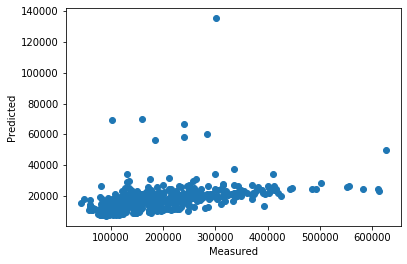

In [7]:
print(my_model.evaluate(X_test, y_test))

y_hat = my_model.predict(X_test)

print("shape of y hat " + str(y_hat.shape))
print("shape of y test" + str(y_test.shape))

fig, ax = plt.subplots()
ax.scatter(y_test, y_hat)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

It is 'overfitting' because the test evaluation is significantly more than the training mse. 

#### (c) Find the test set performance of your model by manually obtaining the predicted values and computing the test set mean squared error based on them.

In [14]:
# Extract the w and b estimates
(w, b) = my_model.layers[0].get_weights()
b = b.reshape(b.shape[0], 1)
print("b shape = " + str(b.shape))
print("w shape = " + str(w.shape))
print("X test shape" + str(X_test.shape))

print("y_test shape" + str(y_test.shape))
# Calculate a vector of z's
z = b + np.dot(w.T, X_test.T) # replace None to the left with an actual calculation

print("z" + str(z.shape))

# Calculate a vector of a's
a = z # replace None to the left with an actual calculation

print("a" + str(a.shape))

# Calculate and print the test set MSE
MSE = np.mean(y_test - a^2)


b shape = (1, 1)
w shape = (36, 1)
X test shape(586, 36)
y_test shape(586, 1)
z(1, 586)
a(1, 586)


TypeError: ignored

## Problem 2: Forest cover type prediction
We have a data set from with characteristics of land in national forests; our goal is to predict the type of forest on that land.  There are 7 possible forest types: Spruce/Fir, Lodgepole Pine, Ponderosa Pine, Cottonwood/Willow, Aspen, Douglas-fir, or Krummholz.  Our features are things like elevation, slope of land, distance to water, soil type, and so on.  (Original data source: https://archive.ics.uci.edu/ml/datasets/Covertype)



In [0]:
# read in data
forest_cover = pd.read_csv("http://www.evanlray.com/data/UCIML/forest_cover/covtype.data")

# drop a couple of columns of all 0's
to_drop = [20, 28]
forest_cover.drop(forest_cover.columns[to_drop], axis = 1, inplace=True)

# how much data do we have?
print("shape of forest_cover = " + str(forest_cover.shape))

# perform a train/validation/test split
# the indices of the split are the same as what was used in the original paper.
# note that their test set is much larger than their train set, but you would
# never do this in real life.
train_slice = slice(0, 11340)
val_slice = slice(11340, 11340+3780)
test_slice = slice(11340+3780, 11340+3780+565892)

X_train = forest_cover.iloc[train_slice, 0:52].to_numpy()
y_train = forest_cover.iloc[train_slice, 52].to_numpy() - 1

X_val = forest_cover.iloc[val_slice, 0:52].to_numpy()
y_val = forest_cover.iloc[val_slice, 52].to_numpy() - 1

X_test = forest_cover.iloc[test_slice, 0:52].to_numpy()
y_test = forest_cover.iloc[test_slice, 52].to_numpy() - 1

shape of forest_cover = (581011, 53)


#### (a) In lab 1, I claimed that an essential preprocessing step for neural networks is to center and scale the inputs.  That isn't really necessary with just a multiple regression model like in problem 1, but it is necessary as soon as you start using sigmoid or softmax activations -- which you'll need in this problem.  Do the input normalization here.

Note that you did this in lab 1, so you could just go find your old code there.  But you might like to try recreating it from scratch first.  (You want to eventually just know how to do things.)

In [0]:
X_train_mean = np.mean(X_train, axis = 0) # add a call to np.mean here.  what will you use for the axis?
X_train_std =  np.std(X_train, axis = 0)# add a call to np.std here.  what will you use for the axis?

print(X_train.shape)
print(X_train_mean.shape)
print(X_train_std.shape)

X_train = X_train - X_train_mean # add code here to subtract the column means from X_train.  How will broadcasting work?
X_train = X_train/X_train_std# add code here to divide X_train by the column standard deviations.  How will broadcasting work?

# normalize X_val, but using X_train_mean and X_train_std to do the normalization
X_val = X_val - X_train_mean # add code here to subtract the column means from X_val
X_val = X_val/X_train_std # add code here to divide X_val by the column standard deviations

# normalize X_test, but using X_train_mean and X_train_std to do the normalization
X_test = X_test - X_train_mean# add code here to subtract the column means from X_test
X_test = X_test/X_train_std# add code here to divide X_test by the column standard deviations


(11340, 52)
(52,)
(52,)


#### (b) Define an appropriate model in Keras.  Use stochastic gradient descent ('sgd') for your optimizer and 'accuracy' as an evaluation metric, and run the estimation process for 1000 epochs using a batch size equal to the number of examples in your training set.  We'll see what these things mean starting next week.
Things to consider:

* How many units do you need in your output layer?
* What activation function do you want to use?
* How many inputs (features) will your network use?
* What is the appropriate loss function to use?

In [0]:
treez = models.Sequential()

treez.add(Dense(units = 3, activation = "relu", input_shape = (52, )))
treez.add(Dense(units = 7, activation = "softmax", input_shape = (52,)))

treez.compile(optimizer = 'sgd', loss = "categorical_crossentropy h", metrics = 'accuracy')


treez.fit(X_train, y_train,
  validation_data = (X_val, y_val),
  epochs = 11340, batch_size = 1875)

#### (c) Get an evaluation of the performance of your model on the test set using the built-in Keras function `evaluate`.  Is there evidence that your model has overfit the training data?  (See the solutions for lab 1 or ask me if you're not sure what this means.)

In [0]:
print(my_model.evaluate(X_test, y_test))

#### (d) Write your own version of the softmax function according to the docstring in the starter function below.
Note that this function expects each observation to be represented in a column of the matrix `z`.

In [0]:
def my_softmax(z):
  '''
  Calculate softmax(z) where z is a K by m matrix
  
  Arguments:
   - z, a K by m matrix: the entry in row j and column i of z contains 
     b_j + w_j^T x^(i), the linear combination of input features for class j and
     observation m (we're assuming this computation has already been done for us)
  
  Return:
   - a K by M matrix where column m is calculated as softmax of column m of z
  '''
  return softmax(z)

If you want, you can test your function above out with the following code to make sure it seems to be working (all entries of the result should be non-negative, and the columns should add up to 1):

In [0]:
z = np.array([[17, 5, 2, 7],
              [5, 5, 1, 2],
              [2, 2, 6, -10]])
my_softmax(z)

#### (e) Find the test set performance of your model by manually obtaining the predicted values.

At some point, you will need to use the softmax function.  Although you wrote your own softmax function above, you should instead use the softmax function from the scipy package that was imported above.  Its implementation is more numerically stable; I'll talk more about this some time later.

To find the class with the highest probability based on your `a` array, check out the [argmax](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html) function in numpy.  This function will find the index of the largest entry along a given `axis` in a vector.

In [0]:
# The next two lines extract the estimated weights w and bias b from the model
# fit and then reshape b to be a 7 by 1 matrix.
(w, b) = multi_logistic_model.layers[0].get_weights()
b = b.reshape(b.shape[0], 1)

# Calculate the vector z here:
# This should involve b, X_test, and w.  Use np.dot() and broadcasting.
# Do you need to find any transposes?
z = 

# Calculate the activation a:
# Use the softmax function.  The softmax function takes an axis argument.
# The axis to use depends on how you set up your calculation for z.
a =  # use softmax here

# Find the predicted value y hat for each observation
y_hat =  # use np.argmax here

# For each prediction, determine whether the prediction was correct by
# comparing it to the observed test set response.  The result of this
# calculation should be a logical vector of the same shape as y_test
# that is True for cases where the test set prediction was correct and False
# for test set cases where the prediction was wrong.
# Careful!  Make sure y_hat and y_test have the same shape before comparing
# them, or else you'll accidentally broadcast the comparison and be confused...
y_hat_correct_lgl = 

# Determine what proportion of your test set predictions were correct by
# calculating the *mean* of the values in the y_hat_correct_lgl variable.
# Note that any True values (correct predictions) are converted to 1 and False
# values are converted to 0 when you do this calculation.
proportion_correct = 

# Print the proportion correct so you can see it after running this code cell
print("Proportion correct = " + str(proportion_correct))